Enter number of data points: 7
Enter number of clusters: 2
Enter coordinates for point 1 (space-separated): 1 1
Enter coordinates for point 2 (space-separated): 1.5 2
Enter coordinates for point 3 (space-separated): 3 4
Enter coordinates for point 4 (space-separated): 5 7
Enter coordinates for point 5 (space-separated): 3.5 5
Enter coordinates for point 6 (space-separated): 4 5
Enter coordinates for point 7 (space-separated): 3.5 4.5
Please enter the initial centroids (one per line):
Enter coordinates for centroid 1 (space-separated): 1 1
Enter coordinates for centroid 2 (space-separated): 5 7
Initial centroids: [[1. 1.]
 [5. 7.]]
Iteration 1: Centroids = [[1.83333333 2.33333333]
 [4.         5.375     ]]
Iteration 2: Centroids = [[1.25 1.5 ]
 [3.8  5.1 ]]
Iteration 3: Centroids = [[1.25 1.5 ]
 [3.8  5.1 ]]
Final centroids: [[1.25 1.5 ]
 [3.8  5.1 ]]


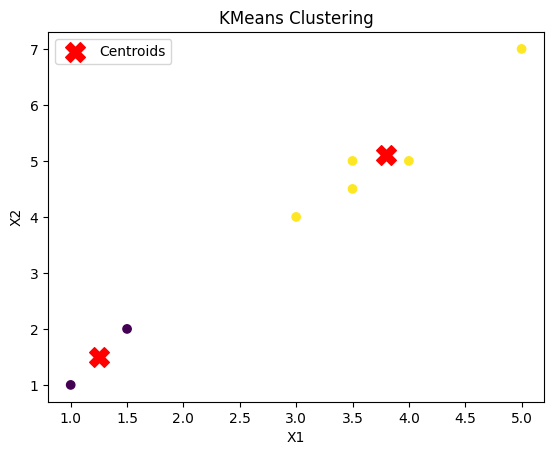

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids_from_user(k):
    centroids = []
    print("Please enter the initial centroids (one per line):")
    for i in range(k):
        centroid = list(map(float, input(f"Enter coordinates for centroid {i+1} (space-separated): ").split()))
        centroids.append(centroid)
    return np.array(centroids)

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids_from_user(k)
    print("Initial centroids:", centroids)

    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        print(f"Iteration {i+1}: Centroids =", new_centroids)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, labels

# User input for dataset
n = int(input("Enter number of data points: "))
k = int(input("Enter number of clusters: "))
X = np.array([list(map(float, input(f"Enter coordinates for point {i+1} (space-separated): ").split())) for i in range(n)])

centroids, labels = kmeans(X, k)
print("Final centroids:", centroids)

# Use X[:, 0] and X[:, 1] for x and y coordinates to match labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()
